In [1]:
# This notebooks aims to:
# - Read the csv and convert it into a pandas dataframe
# - Clean the data
# - Provide insights

In [2]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading data file
csv = pd.read_csv('twitter_purify.csv')

In [4]:
# Preview of the data
csv.head()

csv = csv.rename(columns={"id": "twitter_id"}) # To avoid future column name duplications

# General information about the dataframe

In [5]:
# A few info about the dataframe

print('Number of rows: '+str(csv.shape[0]) + ', Number of columns: '+str(csv.shape[1])+'\n')

print('Type of data in columns: '+ str(csv.dtypes)+'\n')

print('Number of NaN cells (before cleaning): '+str(csv.isnull().sum().sum()))

Number of rows: 37438, Number of columns: 14

Type of data in columns: default_profile              bool
default_profile_image        bool
favorites_count             int64
followers_count             int64
friends_count               int64
geo_enabled                  bool
twitter_id                float64
lang                       object
location                   object
statuses_count              int64
verified                     bool
average_tweets_per_day    float64
account_age_days            int64
account_type               object
dtype: object

Number of NaN cells (before cleaning): 7960


In [6]:
# Trying to find where those NaN values are

csv.isna().sum()

default_profile              0
default_profile_image        0
favorites_count              0
followers_count              0
friends_count                0
geo_enabled                  0
twitter_id                   0
lang                      7957
location                     3
statuses_count               0
verified                     0
average_tweets_per_day       0
account_age_days             0
account_type                 0
dtype: int64

In [7]:
# Cleaning NaN values

csv = csv.dropna()

print('Number of NaN cells: '+str(csv.isnull().sum().sum()) + ' :)')


Number of NaN cells: 0 :)


In [8]:
# Creating dummy variables of account_type so a correlation analysis can be performed
dummies_type = pd.get_dummies(csv['account_type'])

frames = [csv, dummies_type]
data = pd.concat(frames,axis=1)
data.head()

,default_profile,default_profile_image,favorites_count,followers_count,friends_count,geo_enabled,twitter_id,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,bot,human
0,False,False,4,1589,4,False,7.870000e+17,en,unknown,11041,False,7.870,1403,bot,1,0
1,False,False,536,860,880,False,7.960000e+17,en,Estados Unidos,252,False,0.183,1379,human,0,1
2,False,False,3307,172,594,True,8.760000e+17,en,"Los Angeles, CA",1001,False,0.864,1159,human,0,1
3,True,False,8433,517,633,True,7.560000e+17,en,"Birmingham, AL",1324,False,0.889,1489,human,0,1
4,False,False,88,753678,116,True,4.647813e+08,en,"England, United Kingdom",4202,True,1.339,3138,human,0,1


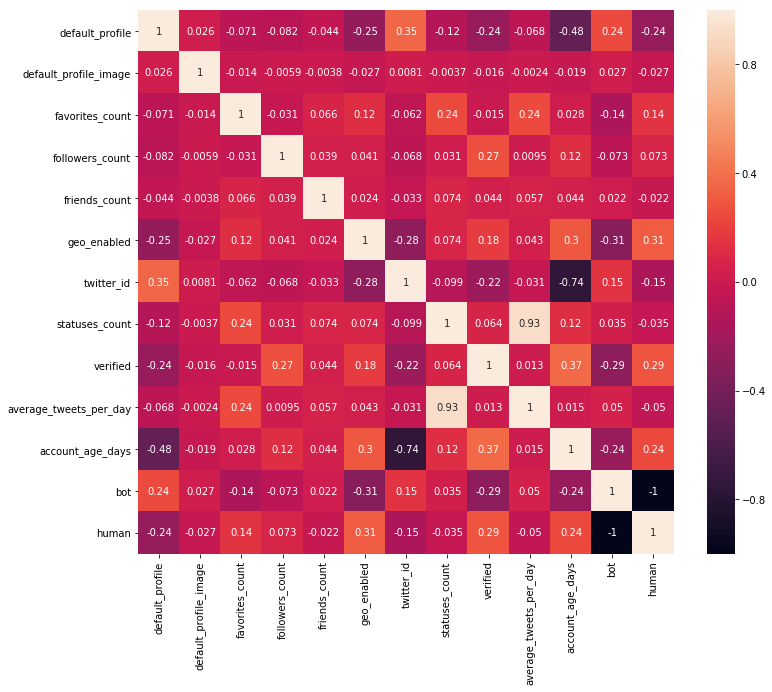

In [9]:
corrMatrix = data.corr()
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(corrMatrix, annot=True,ax=ax)
plt.show()


# Variables that seem more relevant: Default_profile, geo_enabled, verified, account_age_days. 
# Favorites_count and id are less important. 

In [10]:
locations_aux = pd.value_counts(data.location).rename_axis('unique_locations').reset_index(name='counts')
locations_data = locations_aux[locations_aux['counts'] > 1]
locations_data

## Checking this, I have seen that locations with more than 3 words seem to be fake

,unique_locations,counts
0,unknown,8287
1,"Los Angeles, CA",465
2,"New York, NY",322
3,"Washington, DC",216
4,Los Angeles,212
5,United States,211
6,New York,130
7,London,128
8,"Chicago, IL",128
9,"California, USA",120


# Analysis of numeric variables

In [11]:
data.select_dtypes(include=['int64','float64']).describe()

,favorites_count,followers_count,friends_count,twitter_id,statuses_count,average_tweets_per_day,account_age_days
count,29479.000000,2.947900e+04,2.947900e+04,2.947900e+04,2.947900e+04,29479.000000,29479.000000
mean,14061.688761,4.071459e+05,5.312145e+03,1.280830e+17,2.453317e+04,7.918615,3047.541979
std,36480.554761,2.458957e+06,5.438258e+04,3.062987e+17,7.350683e+04,26.473565,1036.721170
min,0.000000,0.000000e+00,0.000000e+00,4.180000e+02,0.000000e+00,0.000000,483.000000
25%,362.000000,8.200000e+01,7.200000e+01,8.419754e+07,1.606000e+03,0.607000,2320.500000
50%,2300.000000,6.670000e+02,3.860000e+02,3.701670e+08,5.966000e+03,2.020000,3267.000000
75%,11144.500000,2.446800e+04,1.067000e+03,2.444486e+09,2.136300e+04,6.789000,3954.000000
max,885123.000000,1.216415e+08,4.343060e+06,1.120000e+18,2.771910e+06,1269.055000,5158.000000


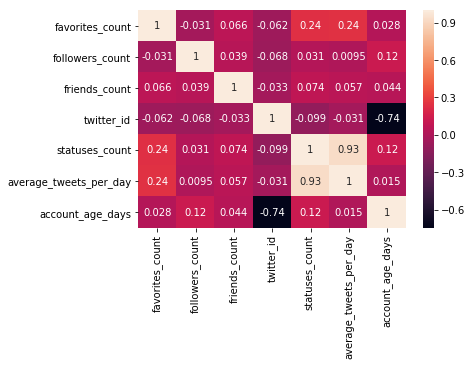

In [12]:
corrMatrix = data.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

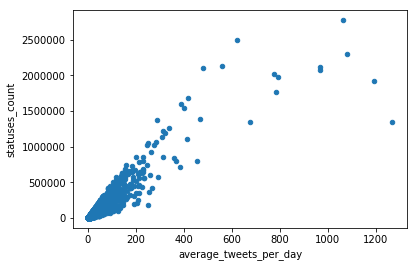

In [13]:
data.plot.scatter(x='average_tweets_per_day',
                      y='statuses_count')

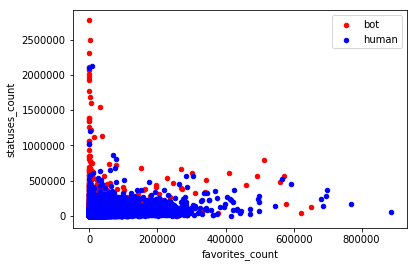

In [14]:
fig, ax = plt.subplots()

colors = {'human':'blue','bot':'red'}

for key, group in data.groupby('account_type'):
    group.plot(ax=ax, kind='scatter', x='favorites_count',
                      y='statuses_count', label=key, color=colors[key])

plt.show()

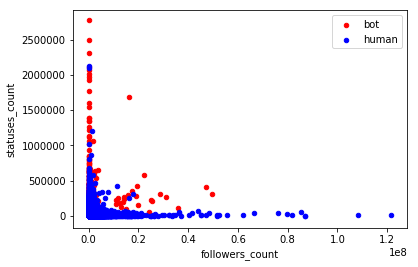

In [15]:
fig, ax = plt.subplots()

colors = {'human':'blue','bot':'red'}

for key, group in data.groupby('account_type'):
    group.plot(ax=ax, kind='scatter', x='followers_count',
                      y='statuses_count', label=key, color=colors[key])

plt.show()

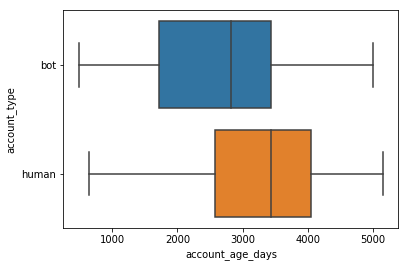

In [16]:
sns.boxplot(data=data, x="account_age_days", y="account_type")

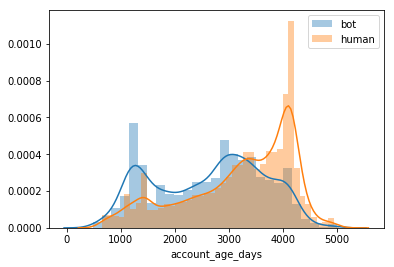

In [17]:
data_bot = data[data['account_type']=='bot']
sns.distplot(data_bot["account_age_days"],label='bot')
data_human = data[data['account_type']=='human']
sns.distplot(data_human["account_age_days"],label='human')
plt.legend(['bot','human'])

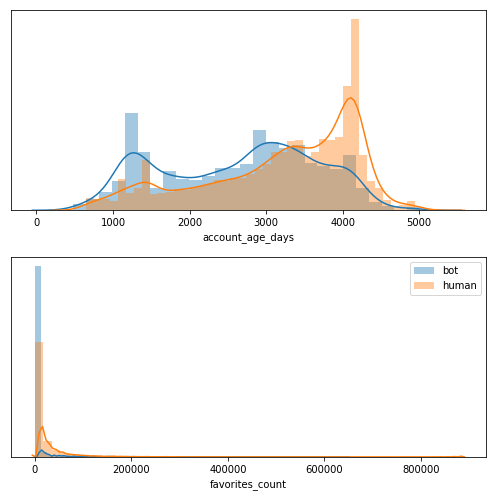

In [18]:
f, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=False)
# sns.despine(left=True)


data_bot = data[data['account_type']=='bot']
sns.distplot(data_bot["account_age_days"],label='bot',ax=axes[0])
data_human = data[data['account_type']=='human']
sns.distplot(data_human["account_age_days"],label='human', ax=axes[0])
plt.legend(['bot','human'])


data_bot = data[data['account_type']=='bot']
sns.distplot(data_bot["favorites_count"],label='bot', ax=axes[1])
data_human = data[data['account_type']=='human']
sns.distplot(data_human["favorites_count"],label='human', ax=axes[1])
plt.legend(['bot','human'])


plt.setp(axes, yticks=[])
plt.tight_layout()

In [19]:
# Creating dummy variables of account_type so a correlation analysis can be performed
dummies_lang = pd.get_dummies(csv['lang'])

frames = [data, dummies_lang]
data = pd.concat(frames,axis=1)
data.head()

,default_profile,default_profile_image,favorites_count,followers_count,friends_count,geo_enabled,twitter_id,lang,location,statuses_count,...,sv,sw,th,tl,tr,uk,ur,vi,zh-cn,zh-tw
0,False,False,4,1589,4,False,7.870000e+17,en,unknown,11041,...,0,0,0,0,0,0,0,0,0,0
1,False,False,536,860,880,False,7.960000e+17,en,Estados Unidos,252,...,0,0,0,0,0,0,0,0,0,0
2,False,False,3307,172,594,True,8.760000e+17,en,"Los Angeles, CA",1001,...,0,0,0,0,0,0,0,0,0,0
3,True,False,8433,517,633,True,7.560000e+17,en,"Birmingham, AL",1324,...,0,0,0,0,0,0,0,0,0,0
4,False,False,88,753678,116,True,4.647813e+08,en,"England, United Kingdom",4202,...,0,0,0,0,0,0,0,0,0,0


# Saving dataframe

In [20]:
# Removing unnecessary columns (bot column is set as target)

data_def = data.drop(columns=['human', 'account_type','location','lang']) # More columns could be added later to the drop list

data_def.to_pickle("./data.pkl")

In [21]:
data_def


,default_profile,default_profile_image,favorites_count,followers_count,friends_count,geo_enabled,twitter_id,statuses_count,verified,average_tweets_per_day,...,sv,sw,th,tl,tr,uk,ur,vi,zh-cn,zh-tw
0,False,False,4,1589,4,False,7.870000e+17,11041,False,7.870,...,0,0,0,0,0,0,0,0,0,0
1,False,False,536,860,880,False,7.960000e+17,252,False,0.183,...,0,0,0,0,0,0,0,0,0,0
2,False,False,3307,172,594,True,8.760000e+17,1001,False,0.864,...,0,0,0,0,0,0,0,0,0,0
3,True,False,8433,517,633,True,7.560000e+17,1324,False,0.889,...,0,0,0,0,0,0,0,0,0,0
4,False,False,88,753678,116,True,4.647813e+08,4202,True,1.339,...,0,0,0,0,0,0,0,0,0,0
5,True,False,237,27394,542,False,8.010000e+17,11513,False,8.428,...,0,0,0,0,0,0,0,0,0,0
6,False,False,5522,291529,1581,True,5.505027e+07,14535,True,3.581,...,0,0,0,0,0,0,0,0,0,0
7,False,False,756,6909959,40,False,8.095007e+08,1223,True,0.421,...,0,0,0,0,0,0,0,0,0,0
9,False,False,36384,2130,3363,True,4.923065e+08,63376,False,20.391,...,0,0,0,0,0,0,0,0,0,0
10,False,False,127,32,0,False,4.325377e+08,921,False,0.290,...,0,0,0,0,0,0,0,0,0,0
